In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('World-happiness-report-2024.csv')

In [49]:
df

,Country_Name,Regional_Indicator,Ladder_Score,Upperwhisker,Lowerwhisker,Log_Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Dystopia_+_Residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
Data Understanding

In [8]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [9]:
df.shape

(143, 12)

In [10]:
df.describe

<bound method NDFrame.describe of          Country name            Regional indicator  Ladder score  \
0             Finland                Western Europe         7.741   
1             Denmark                Western Europe         7.583   
2             Iceland                Western Europe         7.525   
3              Sweden                Western Europe         7.344   
4              Israel  Middle East and North Africa         7.341   
..                ...                           ...           ...   
138  Congo (Kinshasa)            Sub-Saharan Africa         3.295   
139      Sierra Leone            Sub-Saharan Africa         3.245   
140           Lesotho            Sub-Saharan Africa         3.186   
141           Lebanon  Middle East and North Africa         2.707   
142       Afghanistan                    South Asia         1.721   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
0           7.815         7.667               1.844           1.57

In [ ]:
Data Cleaning

In [14]:
df.duplicated

<bound method DataFrame.duplicated of          Country name            Regional indicator  Ladder score  \
0             Finland                Western Europe         7.741   
1             Denmark                Western Europe         7.583   
2             Iceland                Western Europe         7.525   
3              Sweden                Western Europe         7.344   
4              Israel  Middle East and North Africa         7.341   
..                ...                           ...           ...   
138  Congo (Kinshasa)            Sub-Saharan Africa         3.295   
139      Sierra Leone            Sub-Saharan Africa         3.245   
140           Lesotho            Sub-Saharan Africa         3.186   
141           Lebanon  Middle East and North Africa         2.707   
142       Afghanistan                    South Asia         1.721   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
0           7.815         7.667               1.844           

In [18]:
df.columns = df.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')

In [19]:
df.head()

,Country_Name,Regional_Indicator,Ladder_Score,Upperwhisker,Lowerwhisker,Log_Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Dystopia_+_Residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [23]:
df.duplicated().sum()

0

In [34]:
df.isna().sum()

Country_Name                    0
Regional_Indicator              0
Ladder_Score                    0
Upperwhisker                    0
Lowerwhisker                    0
Log_Gdp_Per_Capita              0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_To_Make_Life_Choices    0
Generosity                      0
Perceptions_Of_Corruption       0
Dystopia_+_Residual             0
dtype: int64

In [28]:
mode_value = df['Log_Gdp_Per_Capita'].mode()[0]
df['Log_Gdp_Per_Capita'] = df['Log_Gdp_Per_Capita'].fillna(mode_value)

In [33]:
Social_Support_mean = df['Social_Support'].mean()
df['Social_Support'] = df['Social_Support'].fillna(Social_Support_mean)

Healthy_Life_Expectancy_mean = df['Healthy_Life_Expectancy'].mean()
df['Healthy_Life_Expectancy'] = df['Healthy_Life_Expectancy'].fillna(Healthy_Life_Expectancy_mean)

Freedom_To_Make_Life_Choices_mean = df['Freedom_To_Make_Life_Choices'].mean()
df['Freedom_To_Make_Life_Choices'] = df['Freedom_To_Make_Life_Choices'].fillna(Freedom_To_Make_Life_Choices_mean)

Generosity_mean = df['Generosity'].mean()
df['Generosity'] = df['Generosity'].fillna(Generosity_mean)

Perceptions_Of_Corruption_mean = df['Perceptions_Of_Corruption'].mean()
df['Perceptions_Of_Corruption'] = df['Perceptions_Of_Corruption'].fillna(Perceptions_Of_Corruption_mean)

Dystopia_Residual_mean = df['Dystopia_+_Residual'].mean()
df['Dystopia_+_Residual'] = df['Dystopia_+_Residual'].fillna(Dystopia_Residual_mean)


In [80]:
col = ['Upperwhisker', 'Lowerwhisker', 'Dystopia_+_Residual']
df.drop(columns=col)

,Country_Name,Regional_Indicator,Ladder_Score,Log_Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Happiness_Category
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546,High Ladder Score
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548,High Ladder Score
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182,High Ladder Score
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524,High Ladder Score
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193,High Ladder Score
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,0.534,0.665,0.262,0.473,0.189,0.072,Low Ladder Score
139,Sierra Leone,Sub-Saharan Africa,3.245,0.654,0.566,0.253,0.469,0.181,0.053,Low Ladder Score
140,Lesotho,Sub-Saharan Africa,3.186,0.771,0.851,0.000,0.523,0.082,0.085,Low Ladder Score
141,Lebanon,Middle East and North Africa,2.707,1.377,0.577,0.556,0.173,0.068,0.029,Low Ladder Score


In [ ]:
UNIVARIATE ANALYSIS

<Axes: title={'center': 'Ladder Score'}, xlabel='Ladder_Score'>

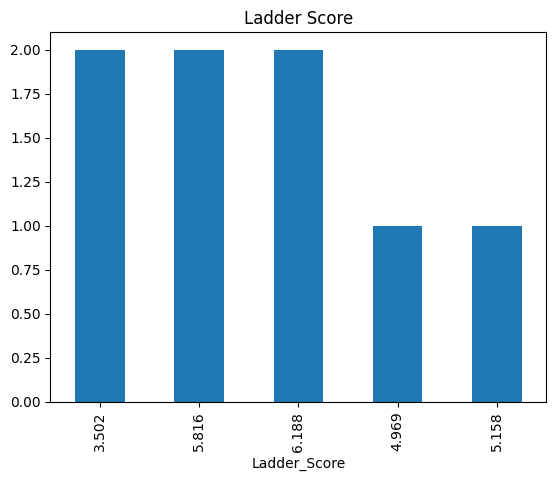

In [42]:
df['Ladder_Score'].value_counts().head().plot(kind='bar', title='Ladder Score')

<Axes: title={'center': 'Log_Gdp_Per_Capita'}, xlabel='Log_Gdp_Per_Capita'>

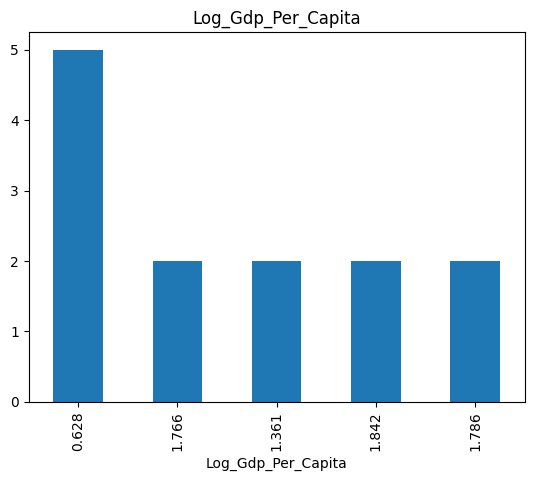

In [43]:
df['Log_Gdp_Per_Capita'].value_counts().head().plot(kind='bar', title='Log_Gdp_Per_Capita')

In [ ]:
BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Top 10 Countries by Freedom to Make Life Choices')

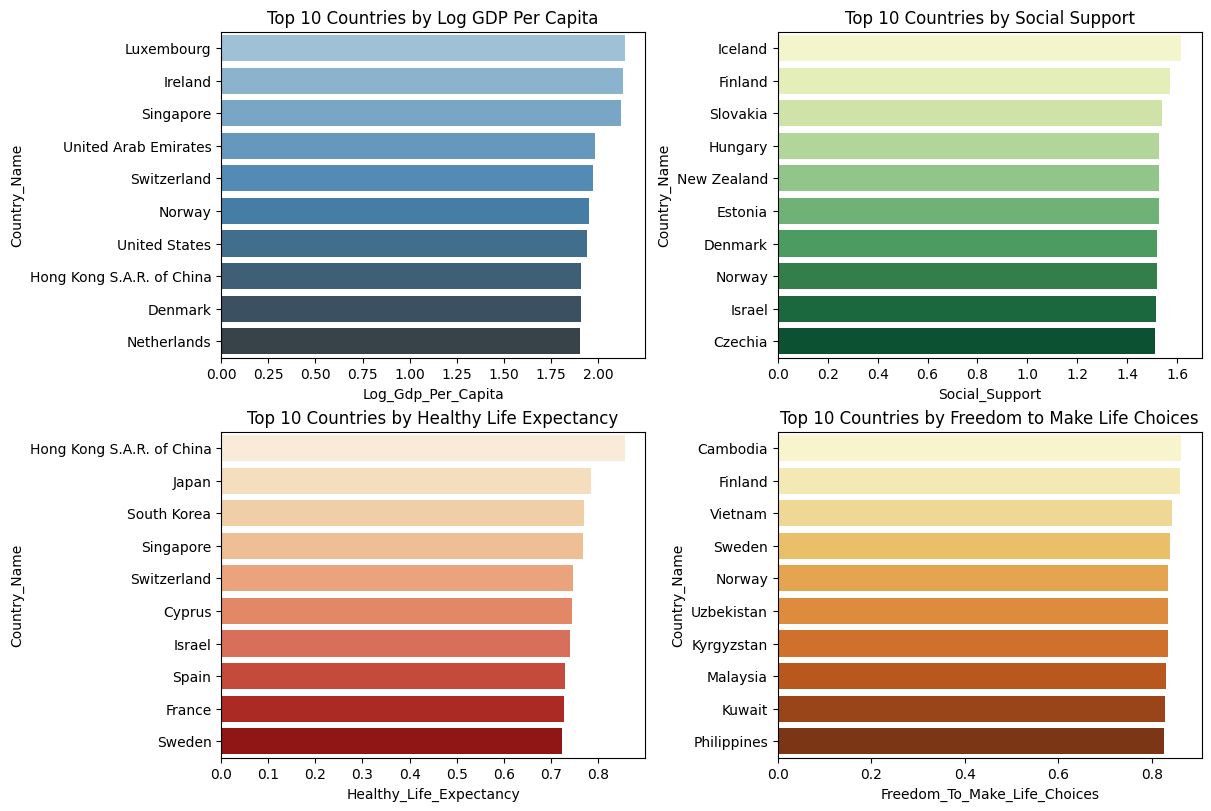

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

sns.barplot(x='Log_Gdp_Per_Capita', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Log_Gdp_Per_Capita'), ax=axes[0, 0], palette="Blues_d", legend=False)

sns.barplot(x='Social_Support', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Social_Support'), ax=axes[0, 1], palette="YlGn", legend=False)

sns.barplot(x='Healthy_Life_Expectancy', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Healthy_Life_Expectancy'), ax=axes[1, 0], palette='OrRd', legend=False)

sns.barplot(x='Freedom_To_Make_Life_Choices', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Freedom_To_Make_Life_Choices'), ax=axes[1, 1], palette='YlOrBr', legend=False)

axes[0, 0].set_title('Top 10 Countries by Log GDP Per Capita')
axes[0, 1].set_title('Top 10 Countries by Social Support')
axes[1, 0].set_title('Top 10 Countries by Healthy Life Expectancy')
axes[1, 1].set_title('Top 10 Countries by Freedom to Make Life Choices')

Text(0.5, 1.0, 'Top 10 Countries by Perceptions of Corruption')

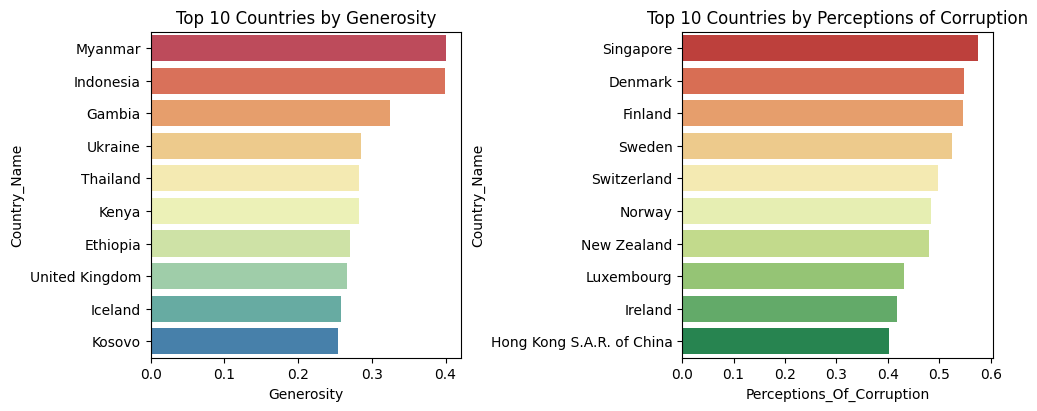

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 4))

sns.barplot(x='Generosity', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Generosity'), ax=axes[0], palette='Spectral', legend=False)

sns.barplot(x='Perceptions_Of_Corruption', y='Country_Name', hue='Country_Name',
            data=df.nlargest(10, 'Perceptions_Of_Corruption'), ax=axes[1], palette='RdYlGn', legend=False)

axes[0].set_title('Top 10 Countries by Generosity')
axes[1].set_title('Top 10 Countries by Perceptions of Corruption')

In [ ]:
MULTIVARIATE ANALYSIS

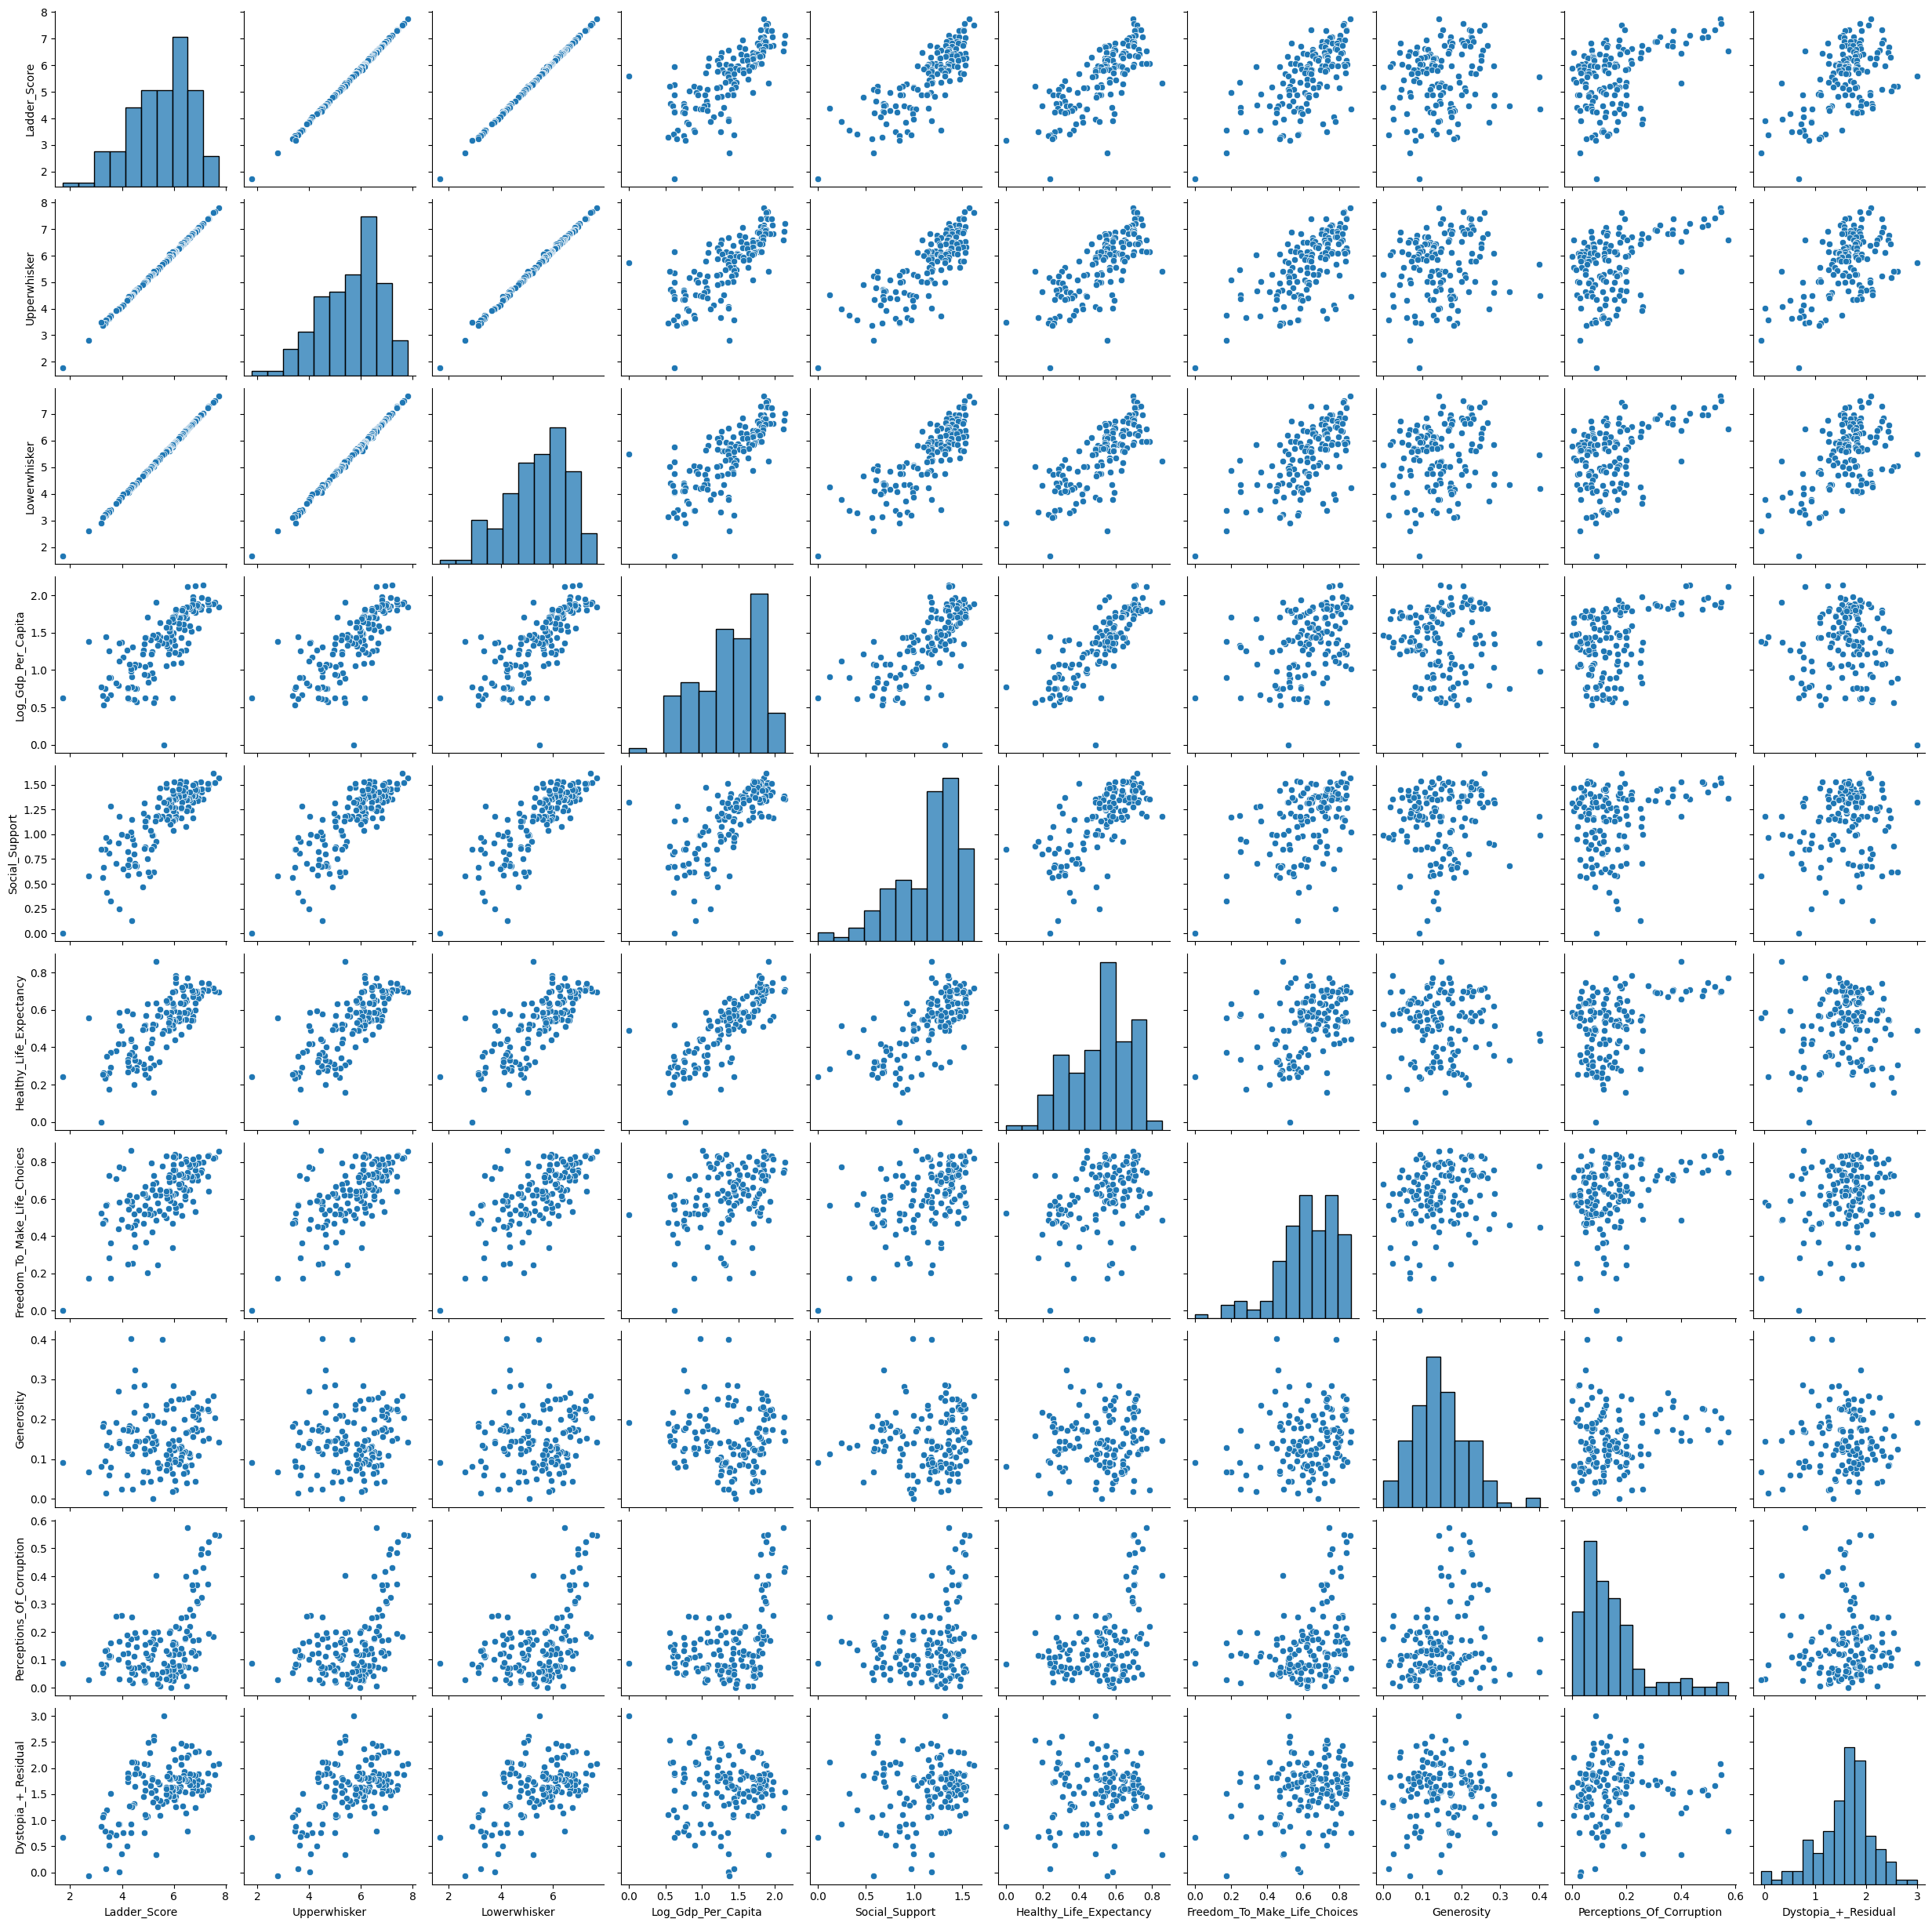

In [54]:
sns.pairplot(df)

In [66]:
print('Max Ladder Score:',df['Ladder_Score'].max())
print('Min LadderScore:',df['Ladder_Score'].min())
range_ladder_score = df['Ladder_Score'].max() - df['Ladder_Score'].min()
rnge = round(range_ladder_score / 3, 3)

print('Range in Ladder Score:', rnge)

Max Ladder Score: 7.741
Min LadderScore: 1.721
Range in Ladder Score: 2.007


In [69]:
Low_Ladder_Score=df['Ladder_Score'].min()+rnge
Mid_Ladder_Score=Low_Ladder_Score+rnge

print('Low Ladder Score',Low_Ladder_Score)
print('Mid Ladder Score',Mid_Ladder_Score)
print('High Ladder Score',df['Ladder_Score'].max())



Low Ladder Score 3.728
Mid Ladder Score 5.735
High Ladder Score 7.741


In [71]:
category=[]
for i in df.Ladder_Score:
    if(i>0 and i<Low_Ladder_Score):
        category.append('Low Ladder Score')
        
        
    elif(i>Low_Ladder_Score and i<Mid_Ladder_Score):
         category.append('Mid Ladder Score')
    else:
         category.append('High Ladder Score')

df['Happiness_Category']=category 

In [73]:
df

,Country_Name,Regional_Indicator,Ladder_Score,Upperwhisker,Lowerwhisker,Log_Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Dystopia_+_Residual,Happiness_Category
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High Ladder Score
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High Ladder Score
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High Ladder Score
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High Ladder Score
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High Ladder Score
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low Ladder Score
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low Ladder Score
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low Ladder Score
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low Ladder Score


In [78]:
color = (df.Happiness_Category == 'High Ladder Score' ).map({True: 'background-color: lightblue',False:'background-color: limegreen'})
df.style.apply(lambda s: color)

,Country_Name,Regional_Indicator,Ladder_Score,Upperwhisker,Lowerwhisker,Log_Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Dystopia_+_Residual,Happiness_Category
0,Finland,Western Europe,7.741000,7.815000,7.667000,1.844000,1.572000,0.695000,0.859000,0.142000,0.546000,2.082000,High Ladder Score
1,Denmark,Western Europe,7.583000,7.665000,7.500000,1.908000,1.520000,0.699000,0.823000,0.204000,0.548000,1.881000,High Ladder Score
2,Iceland,Western Europe,7.525000,7.618000,7.433000,1.881000,1.617000,0.718000,0.819000,0.258000,0.182000,2.050000,High Ladder Score
3,Sweden,Western Europe,7.344000,7.422000,7.267000,1.878000,1.501000,0.724000,0.838000,0.221000,0.524000,1.658000,High Ladder Score
4,Israel,Middle East and North Africa,7.341000,7.405000,7.277000,1.803000,1.513000,0.740000,0.641000,0.153000,0.193000,2.298000,High Ladder Score
5,Netherlands,Western Europe,7.319000,7.383000,7.256000,1.901000,1.462000,0.706000,0.725000,0.247000,0.372000,1.906000,High Ladder Score
6,Norway,Western Europe,7.302000,7.389000,7.215000,1.952000,1.517000,0.704000,0.835000,0.224000,0.484000,1.586000,High Ladder Score
7,Luxembourg,Western Europe,7.122000,7.213000,7.031000,2.141000,1.355000,0.708000,0.801000,0.146000,0.432000,1.540000,High Ladder Score
8,Switzerland,Western Europe,7.060000,7.147000,6.973000,1.970000,1.425000,0.747000,0.759000,0.173000,0.498000,1.488000,High Ladder Score
9,Australia,North America and ANZ,7.057000,7.141000,6.973000,1.854000,1.461000,0.692000,0.756000,0.225000,0.323000,1.745000,High Ladder Score


In [ ]:
df